<center>
    <img src="https://drive.google.com/uc?export=view&id=1hDKusF04c0lNZA_qOShvWQrpImayVKz8"  width="1000" />
</center>

# Tugas Mandiri
---
Tugas mandiri ini digunakan pada kegiatan Kursus Data Science yang merupakan pembekalan bagi mahasiswa Universitas Gunadarma untuk Skema Associate Data Scientist

### Pertemuan 3 - Semester 8

### Daftar Isi :
1. Transformasi Data
2. Rekayasa Fitur
3. Imputasi
    - Missing Completely At Random
    - Missing At Random
    - Missing Not At Random
4. Tahapan dan Teknik Imputasi
5. Teknik Handling Outlier: Trimming vs Winsorizing
6. Scalling
7. Dokumentasi Data/Fitur
8. Pelabelan Data
    - Supervised Learning
    - Unsupervised Learning
    - Semi-supervised Learning
9. Pendekatan Pelabelan Data
10. Menganalisa Akurasi Pelabelan Data
11. Metode QA untuk Mengukur Kualitas Data
12. Keamanan Pelabelan Data


### 1. Transformasi Data
---

Representasi Fitur atau Pembelajaran Fitur:  
- Teknik-Teknik yang memungkinkan sistem bekerja otomatis menemukan representasi yang diperlukan (untuk deteksi fitur atau klasifikasi dari dataset),
- Menggantikan rekayasa fitur manual, dan 
- Memungkinkan mesin mempelajari fitur dan menggunakannya untuk melakukan tugas tertentu.


### 2. Rekayasa Fitur
---

Rekayasa Fitur: 
- Proses mengubah data mentah menjadi fitur yang:
    - Mewakili masalah mendasar ke model prediktif, 
    - Menghasilkan akurasi model yang lebih baik pada data yang tidak terlihat.



### 3. Imputasi
---

Pengertian: Mengganti nilai/data yang hilang (missing value; NaN; blank) dengan nilai pengganti.

Jenis missing value:
1. Missing Completely At Random (MCAR).

Definisi: Probabilitas sebuah instance yang hilang tidak bergantung pada nilai yang diketahui atau nilai yang hilang itu sendiri.

Contoh: Tabel data dicetak tanpa nilai yang hilang dan seseorang secara tidak sengaja menjatuhkan beberapa tinta di atasnya sehingga beberapa sel tidak dapat dibaca lagi. Di sini, kita dapat mengasumsikan bahwa nilai yang hilang mengikuti distribusi yang sama dengan nilai yang diketahui.

2. Missing At Random (MAR).

Definisi: Probabilitas sebuah instance yang hilang mungkin bergantung pada nilai yang diketahui tetapi tidak pada nilai yang hilang itu sendiri.

Contoh: Dalam kasus sensor suhu, fakta bahwa suatu nilai hilang tidak bergantung pada suhu, tetapi mungkin bergantung pada beberapa faktor lain, misalnya pada daya baterai termometer.

Contoh survei: Apakah seseorang menjawab pertanyaan atau tidak - mis. tentang usia- dalam survei tidak tergantung pada jawaban itu sendiri, tetapi mungkin tergantung pada jawaban untuk pertanyaan lain, yaitu jenis kelamin perempuan.


3. Missing Not At Random (MNAR).

Definisi : Probabilitas sebuah instance yang hilang terjadi atau bergantung dengan nilai instance itu sendiri

Pada kasus MNAR, mekanisme bagaimana data tersebut hilang dapat diketahui. Hanya saja, nilai-nilainya tidak dapat disimpulkan. MNAR biasanya terjadi ketika objek penelitian memilih untuk menghindari pertanyaan, misalnya ketika mereka ditanya mengenai jumlah aset. Kelompok usia tertentu mungkin akan memilih untuk tidak menjawabnya. Mekanismenya jelas terlihat, namun sulit untuk bisa mengetahui jumlah pastinya.

### 4. Tahapan dan Teknik Imputasi
---

Imputasi adalah Mengganti nilai/data yang hilang (missing value; NaN; blank) dengan nilai pengganti.

Teknik imputasi berdasarkan tipe data, terdiri dari:
1. Tipe data Variabel Numerik, dengan cara:
   - Imputasi mean atau median.
   - Imputasi nilai suka-suka (arbitrary).
   - Imputasi nilai/data ujung (end of tail).


2. Tipe data Variabel Kategorik, dengan cara:
   - Imputasi kategori yang sering muncul.
   - Tambah kategori yang hilang.

#### 1. Imputasi Tipe data Variabel Numerik

In [1]:
# 1. Import Library Pandas
import pandas as pd

In [2]:
# 2. Memuat data dengan format csv
df =  pd.read_csv("delay_maskapai.csv")

In [3]:
# 3. Menghitung nilai data yang kosong
df.isna().sum()

Flight         0
Time           0
Length         0
Airline        0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Class          0
dtype: int64

In [4]:
# 4. Membuat variabel jumlah data yang akan dihapus secara random sebanyak 234 data
jumlah_hapus = 234

In [5]:
# 5. Membuat variabel untuk menampung indeks dari data yang akan dihapus
indeks_hapus = df.sample(n=jumlah_hapus).index

In [6]:
indeks_hapus

Index([ 4628,  5225,  5640,  3460, 10626,  5423,  1173,  4477,  4995,  8938,
       ...
       10552,  7034,  8760,  9563, 10532,   725,  3913,  4302,  2192,  1883],
      dtype='int64', length=234)

Soal nomor 6 di bawah ini, berikut instruksinya : Buatlah baris menjadi nilai None atau hapus baris sesuai dengan indeks yang dideklarasikan di variabel indeks_hapus dan pada kolom "Time"

In [7]:
# 6. Membuat baris menjadi nilai None atau menghapus baris sesuai dengan indeks yang dideklarasikan di variabel indeks_hapus dan pada kolom "Time"
df.loc[indeks_hapus,"Time"] = None

In [8]:
# 7. Menghitung nilai data yang kosong
df.isna().sum()

Flight           0
Time           234
Length           0
Airline          0
AirportFrom      0
AirportTo        0
DayOfWeek        0
Class            0
dtype: int64

In [10]:
# 8. Menghitung persentase data yang kosong pada kolom "Time"
length_missdata_percentage = ( df.Time.isnull().sum()/ df.shape[0]) * 100
print(f"{length_missdata_percentage} %")

2.169277834430333 %


In [11]:
# 9. Melakukan imputasi pada data yang kosong dengan menggunakan imputasi rata-rata 
meanImputation = df.Time.mean() # Membuat variabel meanImputation untuk menampung nilai rata-rata dari kolom "Time"
meanImputation

803.8241258409931

In [12]:
# 10. Mengisi nilai kosong menggunakan fungsi fillna dengan nilai rata-rata pada kolom Time
df["Time"].fillna(meanImputation, 
                    inplace=True) 

In [15]:
df["Time"].isnull().sum()

0

In [16]:
# Imputasi KNN
df = pd.read_csv("delay_maskapai.csv")

In [20]:
# 11. Import Library Numpy & Mengambil 15% data dari jumlah data yang ada
import numpy as np
sample_size = int(len(df) * 0.15)
df_sample = df.sample(n=sample_size, random_state=1)

In [21]:
df_sample.head()

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
4571,1452.0,852.0,88.0,DL,ATL,CVG,5,0
545,1861.0,980.0,153.0,CO,PHX,IAH,4,1
2196,2445.0,1210.0,80.0,WN,BUR,PHX,4,0
625,108.0,930.0,93.0,DL,MCO,ATL,5,0
4569,1877.0,1360.0,190.0,AA,DFW,LAS,3,0


In [23]:
# 12. Menghapus secara random 243 data dari kolom 'Time'
remove_indices = np.random.choice(df_sample.index, size=243, replace=False)
df_sample.loc[remove_indices, 'Time'] = np.nan

In [24]:
df_sample.isnull().sum()

Flight           0
Time           243
Length           0
Airline          0
AirportFrom      0
AirportTo        0
DayOfWeek        0
Class            0
dtype: int64

In [26]:
# 13. Melakukan import library untuk melakukan imputasi dengan KNN
from sklearn.impute import KNNImputer

In [27]:
# 14. Membuat instance KNNImputer
imputer = KNNImputer(n_neighbors=2)

# 15. Melakukan imputasi dengan KNN pada kolom 'Time' di df_sample
imputed_data = imputer.fit_transform(df_sample[["Time"]])

# 16. Mengganti nilai kosong di df_sample dengan data yang telah diimputasi
df_sample.loc[:, "Time"] = imputed_data

In [28]:
df_sample.isnull().any()

Flight         False
Time           False
Length         False
Airline        False
AirportFrom    False
AirportTo      False
DayOfWeek      False
Class          False
dtype: bool

In [29]:
# 17. Melihat hasil dari data kosong yang telah diimputasi
unique_values = df_sample.loc[remove_indices, 'Time'].unique()

print(unique_values)

[804.64727273]


#### 2. Imputasi Tipe data Variabel Kategorikal

In [30]:
# Memuat data dengan format csv
df = pd.read_csv("delay_maskapai.csv")

In [32]:
# 18. Mengecek tipe data setiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10787 entries, 0 to 10786
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Flight       10787 non-null  float64
 1   Time         10787 non-null  float64
 2   Length       10787 non-null  float64
 3   Airline      10787 non-null  object 
 4   AirportFrom  10787 non-null  object 
 5   AirportTo    10787 non-null  object 
 6   DayOfWeek    10787 non-null  int64  
 7   Class        10787 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 674.3+ KB


In [33]:
# 19. Mengimport Library Numpy dan Sklearn.impute
import numpy as np
from sklearn.impute import SimpleImputer

In [34]:
jumlah_hapus = 814
indeks_hapus = np.random.choice(df.index, jumlah_hapus, replace=False)

In [35]:
# 20. Membuat copy dari kolom AirportFrom 
airportfrom_column = df["AirportFrom"].copy()

# Menghapus baris data secara random sesuai variabel dari indeks hapus di atas
airportfrom_column.loc[indeks_hapus] = np.nan

In [36]:
# 21. Membuat algoritma SimpleImputer dengan strategi 'most_frequent'
modeImputer = SimpleImputer(strategy='most_frequent')

# 22. Melakukan imputasi dengan SimpleImputer
imputed_data = modeImputer.fit_transform(airportfrom_column.values.reshape(-1, 1))

# 23. Memperbaharui data pada kolom Airline dengan data yang telah diimputasi pada imputed_data
df['AirportFrom'] = imputed_data.flatten()

In [37]:
# 24 Mengecek nilai unik dari variabel imputed_data
np.unique(imputed_data)

array(['ABE', 'ABI', 'ABQ', 'ABY', 'ACV', 'AEX', 'AGS', 'ALB', 'AMA',
       'ANC', 'ASE', 'ATL', 'ATW', 'AUS', 'AVL', 'AVP', 'AZO', 'BDL',
       'BET', 'BFL', 'BGM', 'BHM', 'BIL', 'BIS', 'BKG', 'BMI', 'BNA',
       'BOI', 'BOS', 'BQK', 'BQN', 'BRO', 'BRW', 'BTM', 'BTR', 'BTV',
       'BUF', 'BUR', 'BWI', 'BZN', 'CAE', 'CAK', 'CDC', 'CEC', 'CHA',
       'CHO', 'CHS', 'CIC', 'CID', 'CLD', 'CLE', 'CLL', 'CLT', 'CMH',
       'CMI', 'CMX', 'COD', 'COS', 'COU', 'CPR', 'CRP', 'CRW', 'CSG',
       'CVG', 'CWA', 'DAB', 'DAL', 'DAY', 'DBQ', 'DCA', 'DEN', 'DFW',
       'DHN', 'DLH', 'DRO', 'DSM', 'DTW', 'ECP', 'EGE', 'EKO', 'ELM',
       'ELP', 'ERI', 'EUG', 'EVV', 'EWN', 'EWR', 'EYW', 'FAI', 'FAR',
       'FAT', 'FAY', 'FCA', 'FLG', 'FLL', 'FLO', 'FNT', 'FSD', 'FSM',
       'FWA', 'GCC', 'GEG', 'GFK', 'GGG', 'GJT', 'GNV', 'GPT', 'GRB',
       'GRK', 'GRR', 'GSO', 'GSP', 'GTF', 'GTR', 'GUC', 'HDN', 'HLN',
       'HNL', 'HOU', 'HPN', 'HRL', 'HSV', 'HTS', 'IAD', 'IAH', 'ICT',
       'IDA', 'ILM',

In [38]:
# Mengecek apakah ada data kosong pada kolom Airline
df['AirportFrom'].isna().any()

False

### 5. Teknik Handling Outlier : Trimming vs Winsorizing
---

- Trimming
    - Nama lain: Truncation (Potong)
    - Definisi: Menghapus outlier dari dataset 
    - Perlu memutuskan metrik untuk menentukan outlier
- Winsorizing
    - Definisi: Mengganti outlier dari dataset dengan nilai persentil setiap ujung/batas atas dan bawah.



In [39]:
# Memuat data dengan format csv
df = pd.read_csv("delay_maskapai.csv")

In [40]:
df.head()

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,320.0,870.0,180.0,CO,IAH,PHX,5,0
1,3045.0,365.0,66.0,OO,DSM,MKE,2,0
2,1560.0,740.0,257.0,DL,SEA,CVG,7,0
3,1156.0,595.0,235.0,WN,SNA,MDW,7,1
4,1873.0,530.0,133.0,CO,IAH,MCO,6,1


In [41]:
# Import Library matplotlib.pyplot & Seaborn
import matplotlib.pyplot as plt
import seaborn as sns

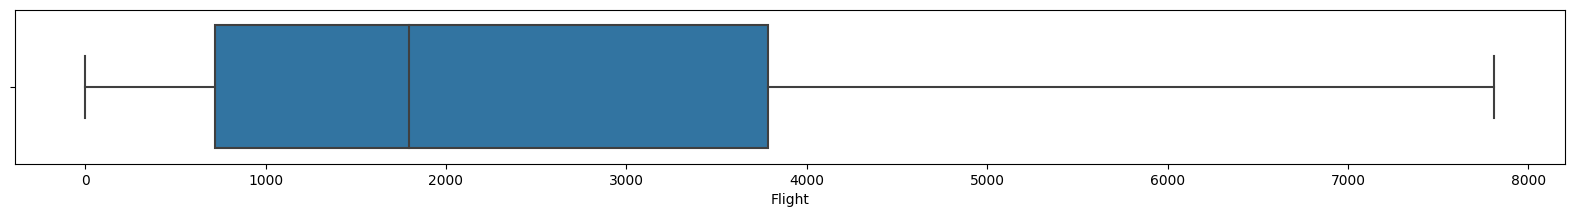

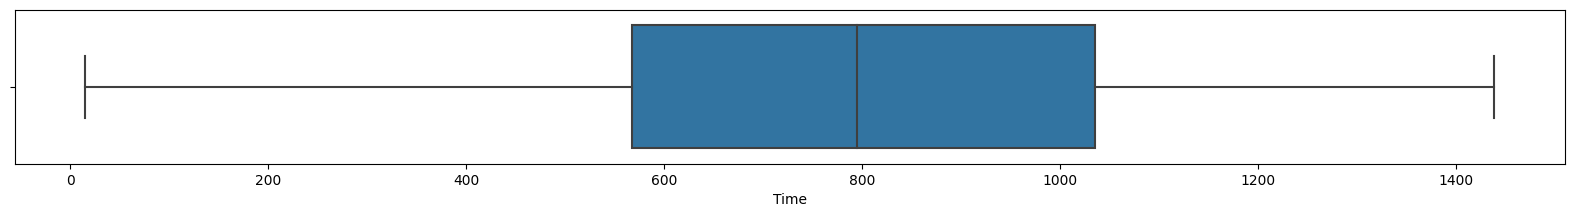

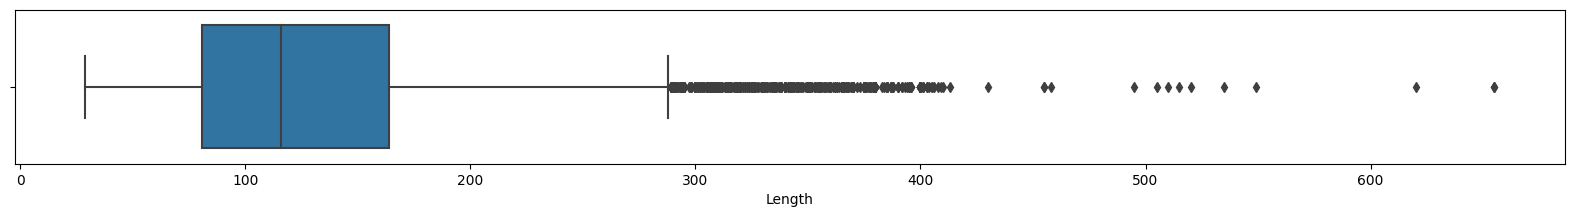

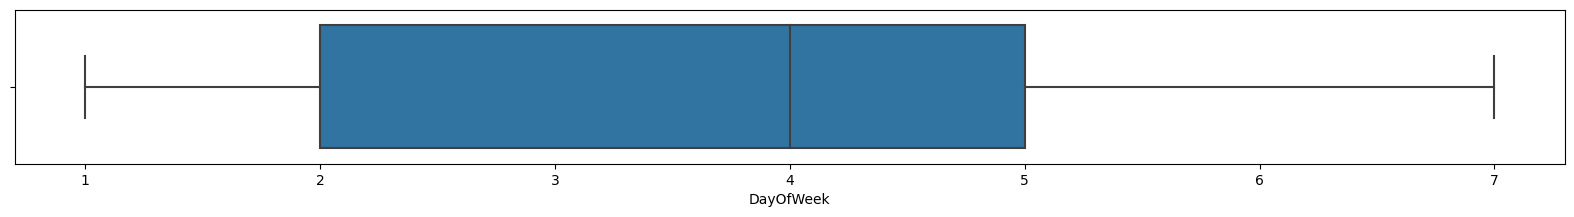

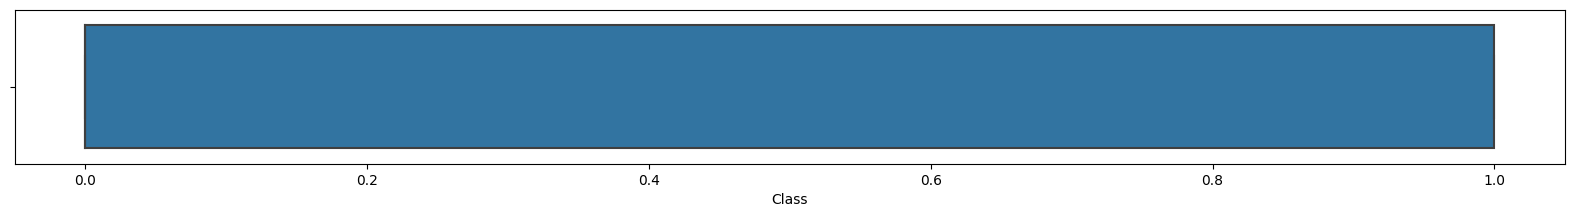

In [42]:
# Mencari Outliers - Boxplot
df_outlier = df.select_dtypes(exclude=['object'])
for column in df_outlier:
        plt.figure(figsize=(20,2))
        sns.boxplot(data=df_outlier, x=column)

Dapa dilihat dari boxplot di atas bahwa kolom Length memiliki outliers di atas batas maksimum

#### Teknik Trimming (Pangkas) Outlier
----

In [43]:
# Mengecek tipe data pada setiap kolom
df.dtypes

Flight         float64
Time           float64
Length         float64
Airline         object
AirportFrom     object
AirportTo       object
DayOfWeek        int64
Class            int64
dtype: object

In [44]:
# 25. Memilih kolom dengan tipe data selain object
df.select_dtypes(exclude="object").head()

,Flight,Time,Length,DayOfWeek,Class
0,320.0,870.0,180.0,5,0
1,3045.0,365.0,66.0,2,0
2,1560.0,740.0,257.0,7,0
3,1156.0,595.0,235.0,7,1
4,1873.0,530.0,133.0,6,1


In [45]:
# 26. Membuat IQR
q1 = df.select_dtypes(exclude="object").quantile(0.25)
q3 = df.select_dtypes(exclude="object").quantile(0.75)
iqr = q3 - q1
iqr

Flight       3065.5
Time          468.0
Length         83.0
DayOfWeek       3.0
Class           1.0
dtype: float64

In [46]:
batas_atas = q3 + 1.5 * iqr
batas_atas

Flight       8383.75
Time         1737.00
Length        288.50
DayOfWeek       9.50
Class           2.50
dtype: float64

In [47]:
# 27. Memangkas Outliers
df_noid_outlier_clean = df[~((df.select_dtypes(exclude="object") < q1 - 1.5 * iqr) | (df.select_dtypes(exclude="object") > q3 + 1.5 * iqr)).any(axis=1)]

In [48]:
df_noid_outlier_clean.head()

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,320.0,870.0,180.0,CO,IAH,PHX,5,0
1,3045.0,365.0,66.0,OO,DSM,MKE,2,0
2,1560.0,740.0,257.0,DL,SEA,CVG,7,0
3,1156.0,595.0,235.0,WN,SNA,MDW,7,1
4,1873.0,530.0,133.0,CO,IAH,MCO,6,1


In [49]:
# Melihat ukuran baris dan kolom setelah dipangkas
df_noid_outlier_clean.shape

(10249, 8)

<Axes: xlabel='Length'>

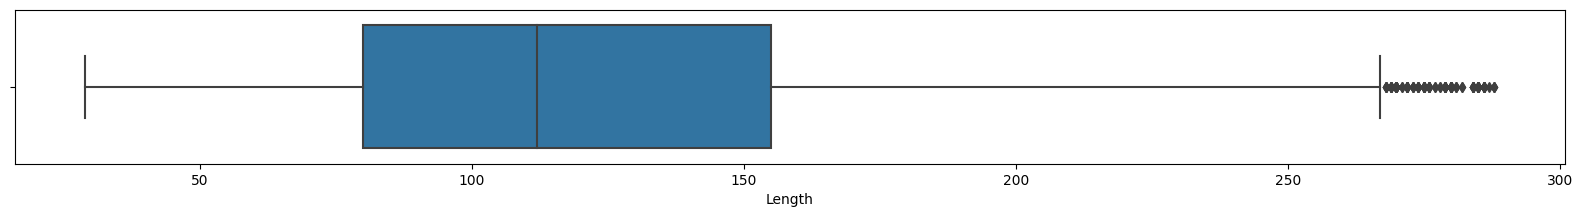

In [50]:
# Mengecek Outliers - Boxplot
plt.figure(figsize=(20,2))
sns.boxplot(data=df_noid_outlier_clean, x=df_noid_outlier_clean['Length'])

In [51]:
q1 = df_noid_outlier_clean['Length'].quantile(0.25)
q3 = df_noid_outlier_clean['Length'].quantile(0.75)
iqr = q3-q1
iqr

75.0

In [52]:
batas_atas = q3 + 1.5 * iqr
batas_atas

267.5

In [53]:
# 28. Melihat jumlah outliers
jml_outliers = (df_noid_outlier_clean['Length'] > batas_atas).sum()
print(jml_outliers)

154


Dapat diketahui bahwa outliers berjumlah <b>(Isi Jawaban di sini)</b>

#### Teknik Winsorizing Outlier
----

In [54]:
# Memuat data dengan format csv
df = pd.read_csv("delay_maskapai.csv")

In [55]:
# 29. Import Library Winsorize
from scipy.stats.mstats import winsorize

In [56]:
# 30. Winsorize data sebanyak 10% dari data yang melewati batas maksimum
df['Length'] = winsorize(df['Length'], limits=[0, 0.05])

<Axes: xlabel='Length'>

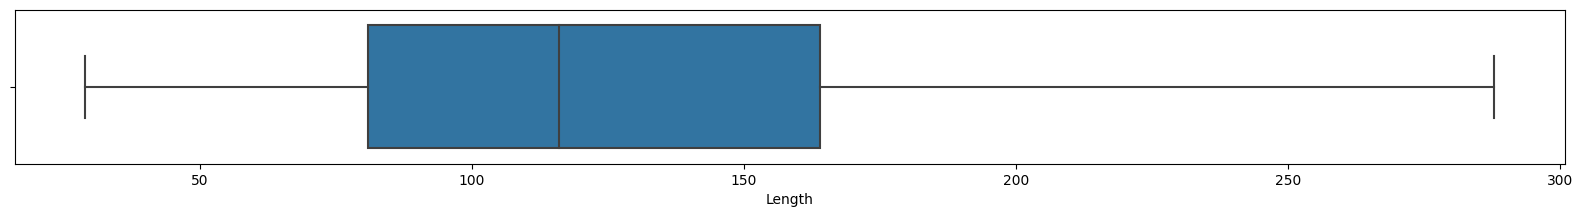

In [57]:
# Melihat outliers pada kolom length dengan menggunakan Boxplot
plt.figure(figsize=(20,2))
sns.boxplot(data=df, x=df['Length'])

In [58]:
# 31. Melihat nilai maksimal dari kolom Length
df['Length'].max()

288.0

### 6. Scaling (Penskalaan)
---

Scaling bertujuan untuk mengubah data ke dalam sebuah skala tertentu, seperti 0-100 atau 0-1. 

Contoh : Data numerik (biasanya) tidak memiliki range. range  “Usia” vs range “Gaji” tidak sama (karakteristik berbeda). Usia memiliki rentang dari 1 sampai 150 (dalam tahun), sedangkan Gaji memiliki rentang dari 10 ribu sampai 100 ribu (dalam dolar). Untuk itu membandingkan perlu scaling.

**Jenis Scaling**
<center>
    <img src="https://drive.google.com/uc?export=view&id=1agHfLrSOktOWrALcI-v4v15EVj2fqVs7"  width="500" />
</center>

#### Scaling : Standardisasi
---

In [59]:
# 32. Melakukan standardisasi dengan library Sklearn
from sklearn.preprocessing import StandardScaler

In [60]:
df = pd.read_csv("delay_maskapai.csv")

In [61]:
# 33. Memanggil objek StandardScaler dari sklearn
scaler = StandardScaler()

In [62]:
# 34, Melakukan standardisasi
df[['Time','Length']] = scaler.fit_transform(df[["Time", "Length"]])

In [63]:
df.head()

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,320.0,0.241211,0.651624,CO,IAH,PHX,5,0
1,3045.0,-1.582136,-0.940654,OO,DSM,MKE,2,0
2,1560.0,-0.228166,1.727109,DL,SEA,CVG,7,0
3,1156.0,-0.751701,1.419828,WN,SNA,MDW,7,1
4,1873.0,-0.986389,-0.004841,CO,IAH,MCO,6,1


#### Scaling : Normalisasi / MinMax Scaling
---

In [64]:
df = pd.read_csv("delay_maskapai.csv")

In [65]:
# 35. Normalisasi / MinMax scaling dengan library sci-kit learn
from sklearn.preprocessing import MinMaxScaler

# 36. Memanggil Objek MinMaxScaler
scaler = MinMaxScaler()

# 37. Melakukan MinMax Scaling
df[['Time','Length']] = scaler.fit_transform(df[["Time", "Length"]])
df.head()

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,320.0,0.600421,0.241214,CO,IAH,PHX,5,0
1,3045.0,0.245787,0.059105,OO,DSM,MKE,2,0
2,1560.0,0.509129,0.364217,DL,SEA,CVG,7,0
3,1156.0,0.407303,0.329073,WN,SNA,MDW,7,1
4,1873.0,0.361657,0.166134,CO,IAH,MCO,6,1


In [ ]:
df = pd.read_csv("delay_maskapai.csv")

In [66]:
from sklearn import preprocessing

In [67]:
# 38. Normalisasi dengan Robust Scaling - Memanggil Objek RobustScaler
scaler = preprocessing.RobustScaler()

# 39. Melakukan Robust Scaling
df[['Time','Length']] = scaler.fit_transform(df[["Time", "Length"]])
df.head()

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,320.0,0.160256,0.771084,CO,IAH,PHX,5,0
1,3045.0,-0.918803,-0.602410,OO,DSM,MKE,2,0
2,1560.0,-0.117521,1.698795,DL,SEA,CVG,7,0
3,1156.0,-0.427350,1.433735,WN,SNA,MDW,7,1
4,1873.0,-0.566239,0.204819,CO,IAH,MCO,6,1


### 7. Dokumentasi Data/Fitur
---

<center>
    <img src="https://drive.google.com/uc?export=view&id=1WnLL7CKZ0955yv2UCcqQ6c2hybBoJV_n"  width="500" />
</center>

Laporan dokumentasi data transformation, setidaknya memiliki parameter berikut:
- Fitur awal dan rekayasa fitur yang digunakan
- Teknik transformasi data yang diterapkan
    - Apakah algoritma pemodelan mengharapkan jenis data tertentu, seperti numerik? Jika demikian, lakukan transformasi yang diperlukan
    - Apakah data perlu dinormalisasi sebelum pemodelan?
    - Bisakah atribut yang hilang dibangun menggunakan agregasi, rata-rata, atau induksi?
- Hasil transformasi
- Rekomendasi transformasi



### 8. Pelabelan Data
---

<center>
    <img src="https://drive.google.com/uc?export=view&id=1N6vd9WgKcDN_EYo-vqrz1_E2HabzyA9f"  width="500" />
</center>

<center>
    <img src="https://drive.google.com/uc?export=view&id=1cM1XDmvN8zNqN2f0-H-wsGZkJmqxWrzC"  width="700" />
</center>

- Label encoding menggantikan nilai kategori dengan angka, yaitu mengubah setiap nilai kategori menjadi bilangan bulat. Pendekatan ini bergantung pada urutan nilai dan dapat digunakan untuk variabel kategorikal dengan tingkatan yang terurut.

    Pada contoh di atas negara India, Japan, dan US diubah menjadi bilangan 0,1,2 dan masih berada pada kolom di atas
    
    Keuntungan label encoding adalah sederhana dan efisien dalam representasi data yang membutuhkan perhatian pada urutan. Namun, metode ini juga bisa menimbulkan masalah seperti memberikan bobot pada variabel kategorikal yang seharusnya tidak ada urutan yang intrinsik, yang dapat menyebabkan algoritma pembelajaran mesin memberikan arti yang tidak diinginkan pada variabel tersebut.

- One-hot encoding menghasilkan vektor biner dengan panjang yang sama dengan jumlah kategori unik dalam variabel. Setiap vektor biner memiliki nilai 1 untuk kategori yang relevan dan nilai 0 untuk kategori lainnya. Pada contoh di atas, kolom negara dipecah sesuai isian datanya sehingga membentuk kolom masing-masing seperti India -> kolom 0, Japan -> kolom 1, dan US -> kolom 2

    Keuntungan one-hot encoding adalah tidak ada penekanan urutan dan tidak ada bobot yang diberikan pada variabel kategorikal. Ini menghindari masalah yang mungkin timbul dengan label encoding. Namun, jika jumlah kategori unik sangat besar, one-hot encoding dapat menyebabkan ledakan dimensi dan meningkatkan kompleksitas pemrosesan.

In [68]:
# 40. Label Encoding - Import Library Sklearn Preprocessing
from sklearn.preprocessing import LabelEncoder

In [69]:
# 41. Memuat Dataset
df = pd.read_csv("delay_maskapai.csv")

In [70]:
# 42. Menyimpan nama kolom yang berjenis kategori ke dalam variabel cat_col
cat_col = ['Airline','AirportFrom','AirportTo','DayOfWeek']

In [71]:
# 43. Encoding Kolom Kategori - Memanggil Objek Label Encoder
le = preprocessing.LabelEncoder()

# 44. Melakukan Label Encoding
df[cat_col] = df[cat_col].apply(le.fit_transform)

In [72]:
# 45. Melihat 15 data terakhir
df.tail(15)

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
10772,3486.0,450.0,245.0,15,164,199,2,1
10773,897.0,1019.0,135.0,8,148,128,0,1
10774,1294.0,1075.0,140.0,1,125,169,6,1
10775,6474.0,961.0,109.0,12,143,2,2,0
10776,6509.0,571.0,92.0,12,260,143,2,0
10777,1679.0,505.0,57.0,4,125,222,0,1
10778,508.0,480.0,325.0,15,162,142,2,1
10779,4961.0,999.0,80.0,6,96,13,5,0
10780,2297.0,560.0,65.0,16,173,53,5,1
10781,1227.0,645.0,75.0,15,216,198,1,0


In [ ]:
# 46. One Hot Encoding - Muat Dataset pada variabel df
df = pd.read_csv("delay_maskapai.csv")

In [73]:
# 47 Menyimpan nama kolom yang berjenis kategori ke dalam variabel cat_col
cat_col = ['Airline','AirportFrom','AirportTo','DayOfWeek']

# 48. Melakukan One Hot Encoding
df = pd.get_dummies(data=df,columns=cat_col,drop_first=True)
df.head()

,Flight,Time,Length,Class,Airline_1,Airline_2,Airline_3,Airline_4,Airline_5,Airline_6,...,AirportTo_261,AirportTo_262,AirportTo_263,AirportTo_264,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6
0,320.0,870.0,180.0,0,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
1,3045.0,365.0,66.0,0,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,1560.0,740.0,257.0,0,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
3,1156.0,595.0,235.0,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,1873.0,530.0,133.0,1,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False


### 8. Menganalisa Akurasi Pelabelan Data
---

- Business Goals suatu AI  yang berbeda memerlukan ukuran kualitas data yang berbeda. 

- Keseimbangan dan variasi titik data di dalam dataset merupakan indikator seberapa baik algoritma dapat memprediksi suatu titik atau pola selanjutnya. 

- Misal tugas suatu AI adalah membedakan antara kendaraan yang bergerak dan tidak bergerak. Jika dataset memuat 90% gambar mobil bergerak tetapi hanya 10% yang diparkir, maka dapat dianggap tidak seimbang. 

- Untuk mengatasi masalah ini dapat digunakan teknik seperti oversampling, downsampling atau weight balancing.

- Kualitas data set untuk pelatihan model sering ditentukan oleh seberapa tepat label dan kategori ditempatkan pada setiap titik data. 
- Namun, bukan hanya tentang keakuratan pelabelan data tetapi juga tentang seberapa konsisten keakuratannya. 
    - Akurasi dan konsistensi data diukur selama proses penjaminan mutu, langkah-langkah terpisah yang dapat dilakukan secara manual atau otomatis.
    - Pendekatan yang berbeda dapat digabungkan untuk cross check dan memastikan kesempurnaan data set.




<center>
    <img src="https://drive.google.com/uc?export=view&id=1xwwQEO-nB993e8UB4V37lrzIl04jagxM"  width="500" />
</center>

#### Apa yang mempengaruhi kualitas data dalam pelabelan?


- Knowledge and context
    - Pengetahuan dasar satu domain dan pemahaman kontekstual sangat penting seperti pemberi label untuk membuat set data terstruktur berkualitas tinggi.
- Agility
    - Pelabelan data berkembang saat dilakukan pengujian dan validasi model, sehingga harus disiapkan data set baru dan memperkaya data set yang ada untuk meningkatkan hasil algoritma Machine Learning.
- Relationship
    - Kita memerlukan pemberi label data yang dapat merespons dengan cepat dan mengikuti alur kerja tim, berdasarkan apa yang telah dipelajari dalam fase pengujian dan validasi model.
- Communication
    - Pendekatan umpan balik (feedback) adalah cara terbaik untuk membangun komunikasi dan kolaborasi yang andal antara tim dan pemberi label data.


### 9. Metode QA untuk Mengukur Kualitas Data
---

- Consensus Algorithm
    - Merupakan proses untuk mencapai reliabilitas data melalui kesepakatan pada satu titik data di antara beberapa individu pemberi label data atau suatu organisasi. 
    - Konsensus dapat dilakukan dengan menetapkan sejumlah reviewer per titik data (umumnya untuk data open source) atau sepenuhnya otomatis.

- Benchmarking and Gold Standard
    - Benchmarking adalah pendekatan yang lebih kompleks dan andal untuk QA, karena menggunakan standar tertentu.
    - Menggunakan otomatisasi, pemberi label mendapatkan benchmark secara acak untuk memastikan bahwa label dan anotasi mematuhi referensi yang telah ditentukan
    - Ahli diperlukan hanya untuk membuat referensi dan meninjau kualitas secara keseluruhan dan potensi penyimpangan.
    
- Sample review
    - Pilih sampel acak dari hasil pelabelan yang telah diselesaikan.
    - Pekerja yang lebih berpengalaman, seperti pemimpin tim atau manajer proyek, dapat meninjau sampel untuk mengukur akurasinya.

- Cronbach's Alpha Test
    - Digunakan sebagai ukuran korelasi rata-rata atau konsistensi item dalam dataset, yang tergantung pada karakteristik penelitian (misal homogenitas).
    - Dapat membantu dengan cepat melihat keandalan label secara keseluruhan.



### 10.Keamanan Pelabelan Data
---

Tiga area yang perlu menjadi perhatian untuk menjaga keamanan dokumen
- **Orang dan Tenaga Kerja** : Ini dapat mencakup pemeriksaan latar belakang untuk pekerja dan mungkin mengharuskan pemberi label untuk menandatangani perjanjian kerahasiaan (NDA) atau dokumen serupa yang menguraikan persyaratan keamanan data.
- **Teknologi dan Jaringan** : Pekerja mungkin diminta untuk menyerahkan perangkat yang mereka bawa ke tempat kerja, seperti ponsel atau tablet.
- **Fasilitas dan Ruang Kerja** : Pekerja dapat duduk di tempat yang menghalangi orang lain untuk melihat pekerjaan mereka.
